In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/akashngowda/Downloads/possum.csv')

# Display the first few rows
print(data.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [2]:
# Summary statistics of the dataset
print(data.describe(include='all'))

              case        site    Pop  sex         age     hdlngth  \
count   104.000000  104.000000    104  104  102.000000  104.000000   
unique         NaN         NaN      2    2         NaN         NaN   
top            NaN         NaN  other    m         NaN         NaN   
freq           NaN         NaN     58   61         NaN         NaN   
mean     52.500000    3.625000    NaN  NaN    3.833333   92.602885   
std      30.166206    2.349086    NaN  NaN    1.909244    3.573349   
min       1.000000    1.000000    NaN  NaN    1.000000   82.500000   
25%      26.750000    1.000000    NaN  NaN    2.250000   90.675000   
50%      52.500000    3.000000    NaN  NaN    3.000000   92.800000   
75%      78.250000    6.000000    NaN  NaN    5.000000   94.725000   
max     104.000000    7.000000    NaN  NaN    9.000000  103.100000   

            skullw    totlngth       taill    footlgth    earconch  \
count   104.000000  104.000000  104.000000  103.000000  104.000000   
unique         NaN 

In [3]:
# Check for missing values
print(data.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


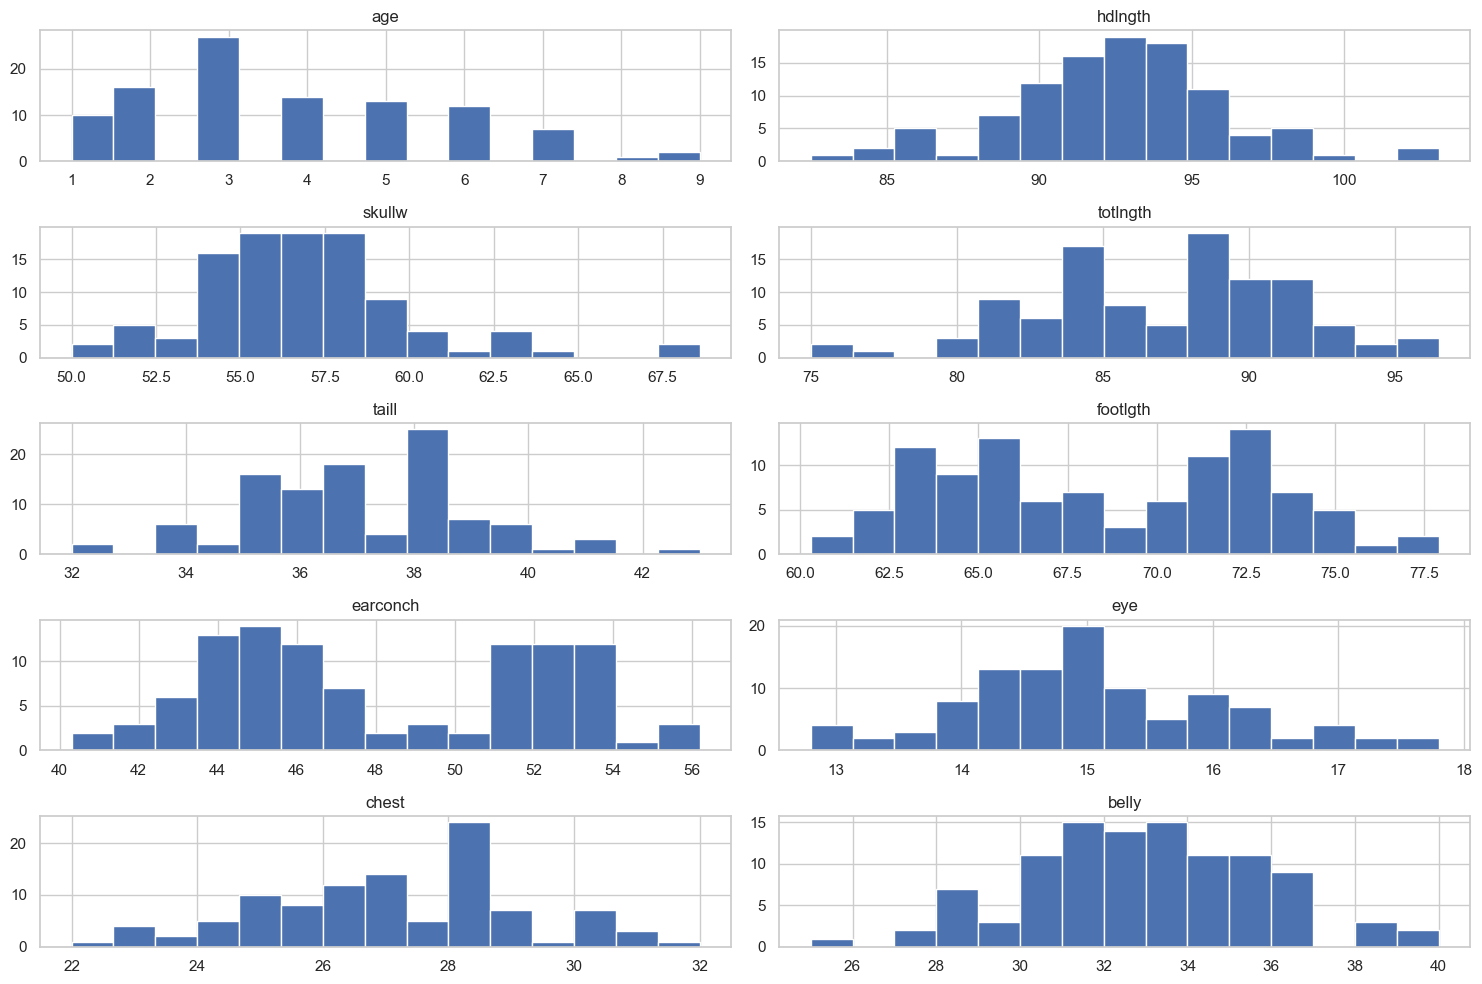

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot the distribution of numerical variables
numerical_cols = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(5, 2))
plt.tight_layout()
plt.show()

In [7]:
# Fill missing values (example: using the mean)
data['age'].fillna(data['age'].mean(), inplace=True)
data['footlgth'].fillna(data['footlgth'].mean(), inplace=True)

Mean Squared Error: 11.072313103655507
R-squared: -0.000284764664975512


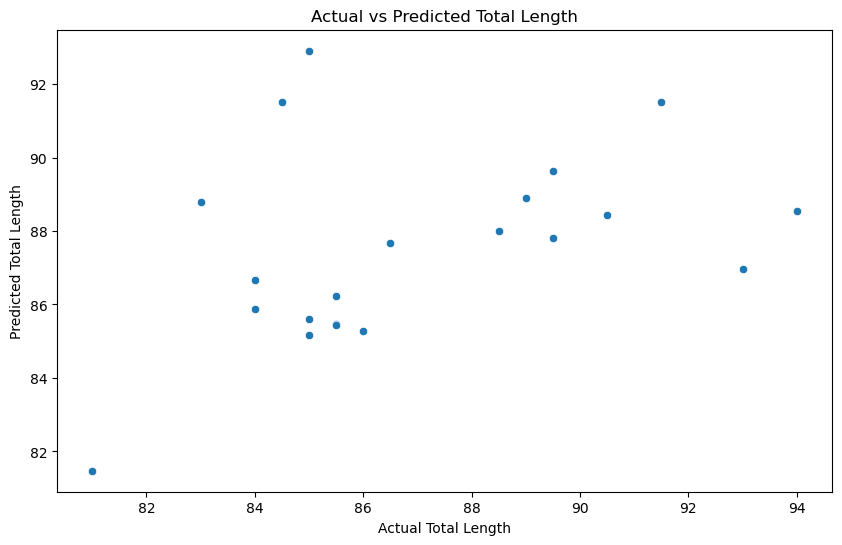

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/akashngowda/Downloads/possum.csv'
data = pd.read_csv(file_path)

# Define the features (independent variables) and target (dependent variable)
X = data[['hdlngth', 'skullw']]  # Features: head length and skull width
y = data['totlngth']  # Target variable: total length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Length')
plt.ylabel('Predicted Total Length')
plt.title('Actual vs Predicted Total Length')
plt.show()

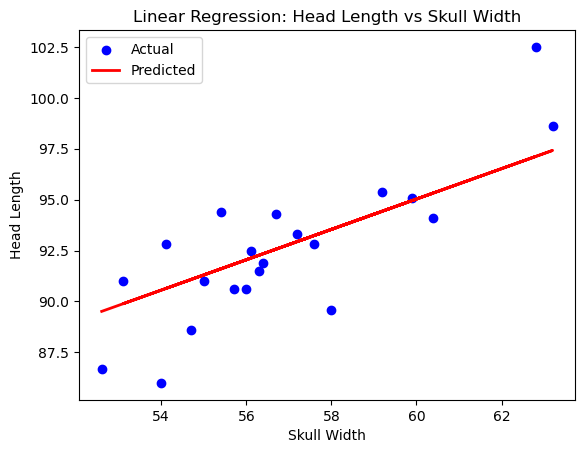

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
file_path = r'/Users/akashngowda/Downloads/possum.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_clean = data.dropna()

# Define the feature and target variables
X = data_clean[['skullw']]
y = data_clean['hdlngth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Adding labels and title
plt.xlabel('Skull Width')
plt.ylabel('Head Length')
plt.title('Linear Regression: Head Length vs Skull Width')

# Adding legend
plt.legend()

# Display plot
plt.show()

Mean Squared Error: 3.1743341974851402
Intercept: 22.38030778063296
Coefficients:
case: 0.018199623065627696
age: 0.16741501049845106
skullw: 0.2017670555088745
totlngth: 0.3636873564548834
taill: -0.44251883426065713
footlgth: 0.14517537312305467
earconch: 0.22091885961617597
eye: 0.6274363403770865
chest: 0.1372307565090083
belly: 0.2026932834751299
site_2: -0.4625919552157402
site_3: -0.4047154948055582
site_4: 1.4421065465164833
site_5: 0.37568513477197246
site_6: -0.3961614515568805
site_7: 1.0660378167508893
Pop_other: 2.0829525516769074
sex_m: 0.39090056314823346


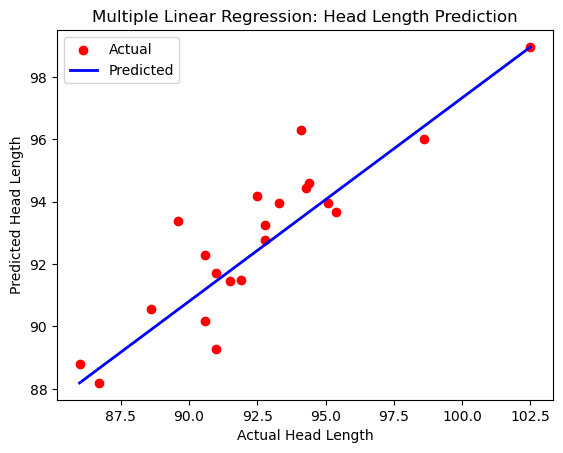

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
file_path = r'/Users/akashngowda/Downloads/possum.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_clean = data.dropna()

# Encode categorical variables
data_clean = pd.get_dummies(data_clean, columns=['site', 'Pop', 'sex'], drop_first=True)

# Define the feature and target variables
X = data_clean.drop(columns=['hdlngth'])
y = data_clean['hdlngth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the results
intercept = model.intercept_
coefficients = model.coef_

print(f'Mean Squared Error: {mse}')
print(f'Intercept: {intercept}')
print('Coefficients:')
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='red', label='Actual')

# Adding labels and title
plt.xlabel('Actual Head Length')
plt.ylabel('Predicted Head Length')
plt.title('Multiple Linear Regression: Head Length Prediction')

# Adding a regression line
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='blue', linewidth=2, label='Predicted')

# Adding legend
plt.legend()

# Display plot
plt.show()

Mean Squared Error (MSE): 11.072313103655507
R-squared (R²): -0.000284764664975512
Coefficients: [0.80094278 0.14277597]
Intercept: 4.911312623667101


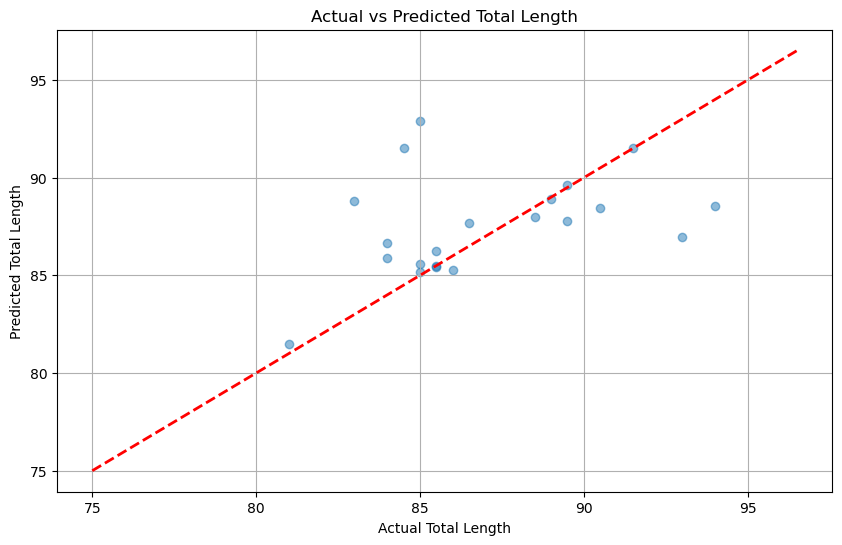

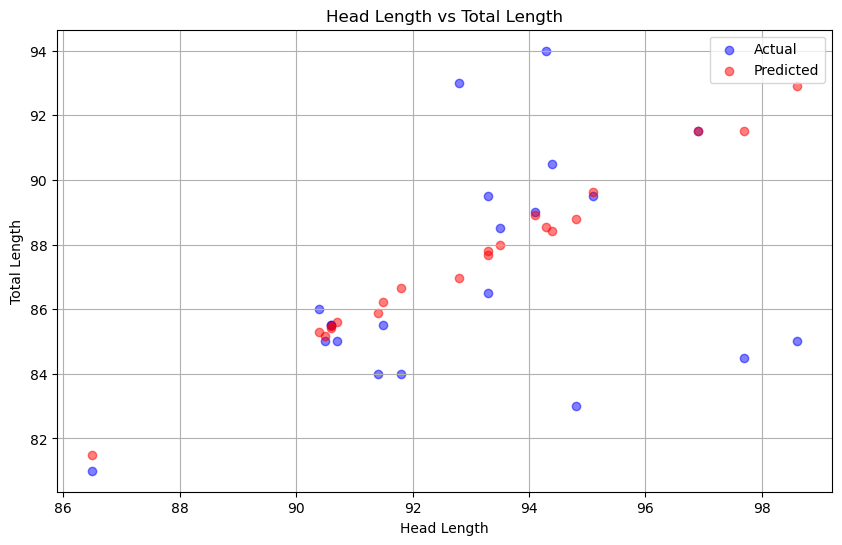

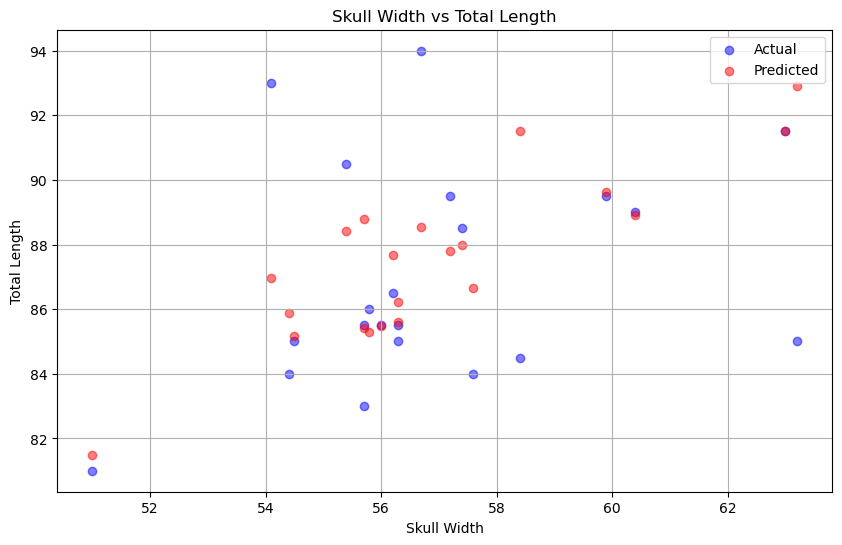

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/akashngowda/Downloads/possum.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in critical columns
data_clean = data.dropna(subset=['totlngth', 'hdlngth', 'skullw'])

# Select features and target variable
X = data_clean[['hdlngth', 'skullw']]
y = data_clean['totlngth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Scatter plot for actual vs predicted total length
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Total Length')
plt.ylabel('Predicted Total Length')
plt.title('Actual vs Predicted Total Length')
plt.grid(True)
plt.show()

# Scatter plot for head length vs total length with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['hdlngth'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['hdlngth'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Head Length')
plt.ylabel('Total Length')
plt.title('Head Length vs Total Length')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for skull width vs total length with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['skullw'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['skullw'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Skull Width')
plt.ylabel('Total Length')
plt.title('Skull Width vs Total Length')
plt.legend()
plt.grid(True)
plt.show()

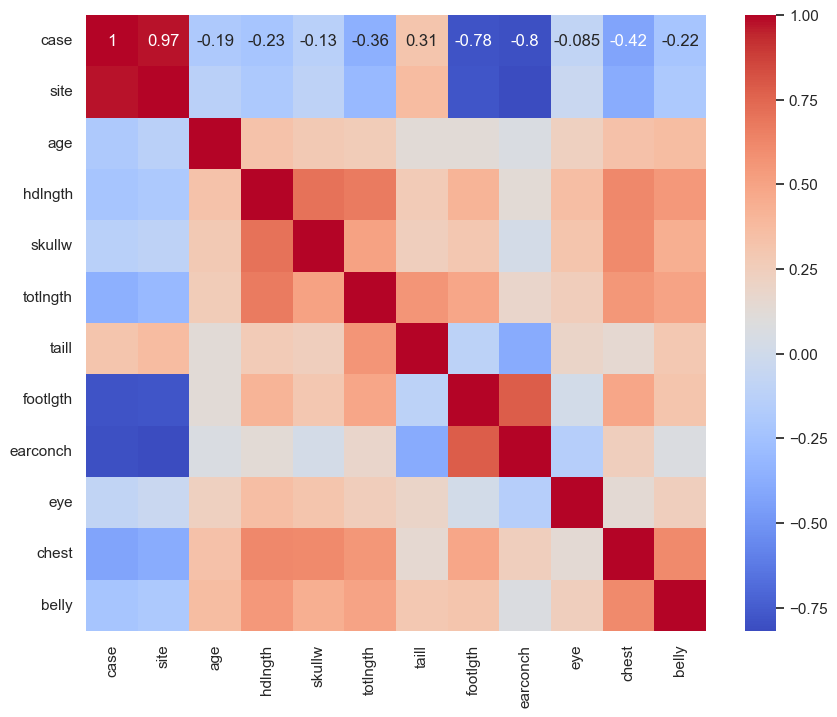

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/akashngowda/Downloads/possum.csv')

# Check for missing values and fill/drop them
data = data.dropna()

# Ensure all columns are numeric
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()